# **EDA ON HOUSING PRICE PREDICTION DATA**  
Find any variable that affect house price the most using a dataframe taken from Kaggle named **['Housing Price Prediciton Data'](https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data/)**.

## **1. Checking the Attributes** 
To start with, we must understand all of variable's datatype and check if there are any null values that needs pre-processing. 

We use `dataframe.info()` function to show both type and amount of non-null values. It also shows total of entry count, so we can detect null values by checking each variables if any of them have less non-null value than the total entry count.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from dataframe and loads it onto program
df = pd.read_csv("hpd.csv")

# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


The `info()` function shows that there are no null values. Therefore no need to edit the dataframe, for now.

### Attributes List
Short descriptions of each attributes gathered in a table.

| ATTRIBUTE | DESCRIPTION |
|:---|:---|
| SquareFeet | the size of house's area |
| Bedrooms | amount of bedrooms inside house |
| Bathrooms | amount of bathrooms inside house |
| Neighborhood | what category of neighberhood the house reside in |
| YearBuilt | which the year the house was built |
| Price | numeric value of a house. |

### **Attributes in Histogram**
Below is a figure showing five out of six attributes from the dataframe on a histogram using `dataframe.hist` function. The y-values are representing the amount of data that falls into the category of x-value. The attribute \`**Neighborhood**\` are not included due to having string datatype in which can't be processed well on a histogram unless each category are changed into its own representing numeric values.

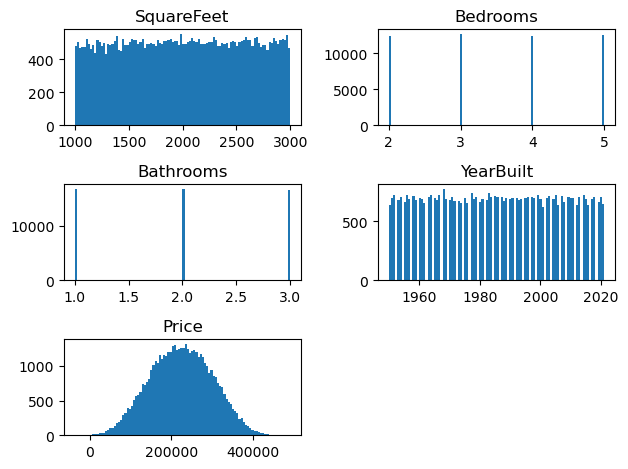

In [14]:
# Show all data on histogram on <100 columns and without grid
df.hist(bins=100, grid=False)

# Advoid graph clipping with one to another
plt.tight_layout()

Quick observations shows that the attribute \`**Price**\` is the only one with the bell curve shape on its graph. Rest are close to normal distributions.

## **2. Pre-processing**
The path we choose for current EDA is **graphical** where patterns can be seen ousing plot/graphs instead of formulas. The graph we use to find the variable are heatmaps and histogram. Both works only with numeric values, so in turn \`**Neighborhood**\` attribute needs to be pre-processed into a numeric value. 

But before that, there is some bit of curiosity I want to check out.

### Does \`YearBuilt\` and \`SquareFeet\` have any relations?
One question arise from conteplation about raising population and increasing price for people to have homes, at least on developed countries. Does homes gets smaller? To answer that, we put on a histogram where y-values are for \`**SquareFeet**\` attribute and x-values for \`**YearBuilt**\`.

Text(0.5, 1.0, 'YearBuilt x SquareFeet')

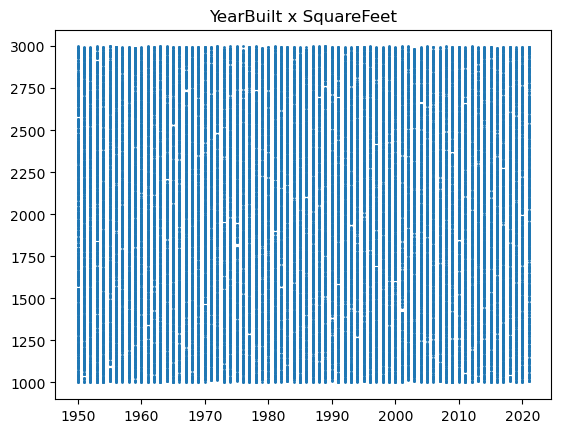

In [15]:
# See bias between house size and yearbuilt
plt.scatter(df.YearBuilt, df.SquareFeet, s=1)
plt.title("YearBuilt x SquareFeet")

Looks like there are still small and big houses no matter the time it is built.

### Does rural houses have cheaper price?
Maybe less maintenance and no economic flow will lower the price of homes. We will find out using graph below.

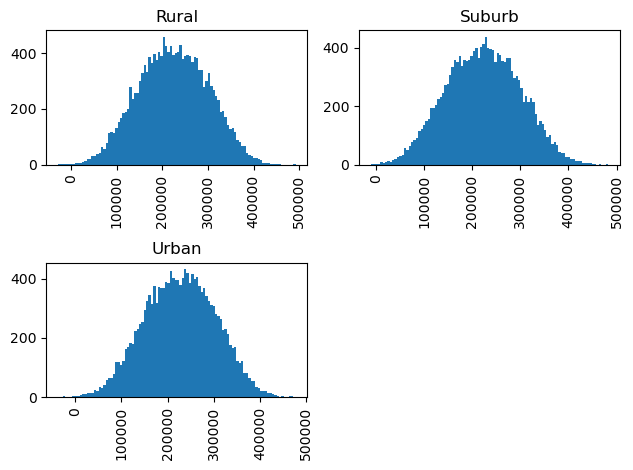

In [16]:
# See correlation between price and neighborhood
df['Price'].hist(bins=100, grid=True, by=df['Neighborhood'])
plt.tight_layout()

Nope. All categories have same bell distribution and even same range of price. Anyways, here is the bit where pre-processing is being done.

### **Turning string into numeric**
Tl;dr
 
To use heatmaps, we need all attributes have a numeric values. Therefore we must turn all of \`**Neighborhood**\`'s value into a numeric one by having its words string turned into numeric string then into numeric value. All of this done using two function, `dataframe.replace()` and `pandas.to_numeric()`. 

In [ ]:
# Rural as 0; Suburban as 1; Urban as 2
man = df.replace(regex={'Rural' : '0', 'Suburb': '1', 'Urban': '2'})
df['Neighborhood'] = pd.to_numeric(man['Neighborhood'])

## **3. Data Processing**
### **Histograms**
Below are the histogram method where each plot only works with one variable.

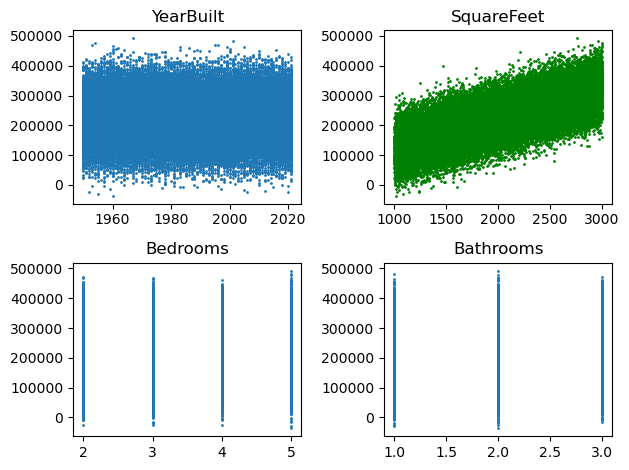

In [17]:
# Price x Everything

plt.subplot(2,2,1) # (col, row, nth plot)
plt.scatter(df.YearBuilt, df['Price'], s=1)
plt.title("YearBuilt")

plt.subplot(2,2,2)
plt.scatter(df['SquareFeet'], df['Price'], s=1, c='g')
plt.title("SquareFeet")

plt.subplot(2,2,3)
plt.scatter(df['Bedrooms'], df['Price'], s=1)
plt.title("Bedrooms")

plt.subplot(2,2,4)
plt.scatter(df['Bathrooms'], df['Price'], s=1)
plt.title("Bathrooms")

plt.tight_layout()

The only variable that seems to have an effect on **\`Price\`** attribute is \`**SquareFeet**\`. It can be concluded from this graph that increasing size of house's area will, in turn, increase its price.

### **Heatmap**
Using **seaborn libary**, we can produce a heatmap of the dataframe where we can see the relation of each variable with any other variables than themself. The heatmap will display a table with dimention only messured with square amount of variable the dataframe have. Each cell from the table will have color of its own where it represent the attribute's relation on cell's row with the other attribute on cell's column. On default, brighter color means greater relation/effect between two attributes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  int64  
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.3 MB


<AxesSubplot: >

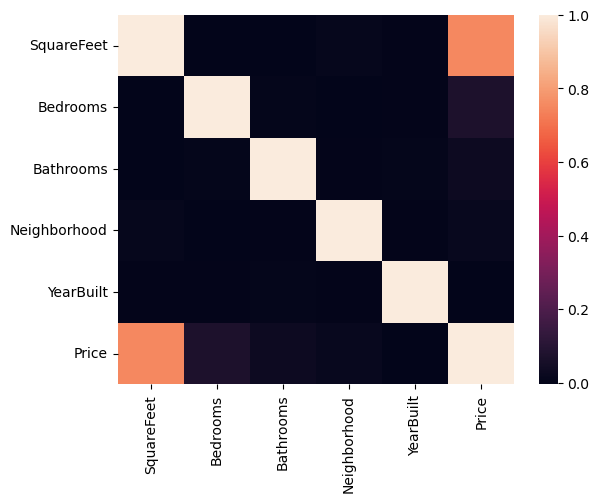

In [24]:
import seaborn as sb

# Check if `Neighborhood` is already a numeric value
df.info()

# Making 2D datamatrix from correlation value between each attributes
show = df.corr()

# Show heatmap using value from the 2D datamatrix
sb.heatmap(show)

## **Conclusion**
Both graphic method shows that \`**SquareFeet**\` affects house prices the most and \`**Bedrooms**\` slightly do so.

###### *Made by Group 11A for StatProb Class*